In [1]:
import gower
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import chi2
import matplotlib.pyplot as plt
import os
import sys

In [2]:
#import custom modules
sys.path.append(os.path.abspath(os.path.join('..','scripts')))
import preprocessing
import utils

In [3]:
df = preprocessing.load_dataset()
dist_matrix = gower.gower_matrix(df)

In [4]:
# pass from distance to covariance/similarity matrix (see linked paper)
dist_matrix = np.ones(dist_matrix.shape) - (dist_matrix)

In [5]:
## will contain tuples (num_of_components, explained_variance)
# care in needs 2 minute2 to run
explained_variances = [] 
for n_components in range(0, 20):
    pca = PCA(n_components=n_components)
    pca.fit(dist_matrix)
    explained_variances.append((n_components, (np.sum(pca.explained_variance_ratio_))))

In [7]:
explained_variances

[(0, 0.0),
 (1, 0.559928439187282),
 (2, 0.8337398711293647),
 (3, 0.8965657010064894),
 (4, 0.9263720704987455),
 (5, 0.9482514973175598),
 (6, 0.9648883208608543),
 (7, 0.9751006461778123),
 (8, 0.9811180963985376),
 (9, 0.9849531618435836),
 (10, 0.9878628461017741),
 (11, 0.9901748671356075),
 (12, 0.9918659665177922),
 (13, 0.9933674820406563),
 (14, 0.9945836410513768),
 (15, 0.9956447699347318),
 (16, 0.996565810010553),
 (17, 0.9973882018644928),
 (18, 0.9979206688860969),
 (19, 0.9983642771587349)]

Optimal # of components:  8


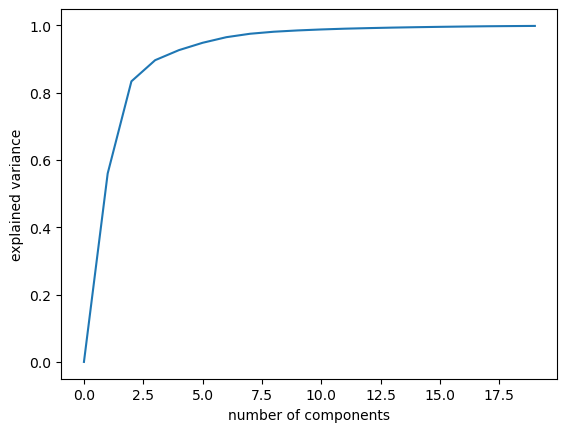

In [8]:
# We take the minimum number of components that explains at least 98% of the variance
threshold_variance = 0.98
optimal_n_components = -1
for i,v in explained_variances:
    if v > threshold_variance:
        optimal_n_components = i
        break
print("Optimal # of components: ", optimal_n_components)

plt.plot([var for (_, var) in explained_variances] )
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

NCOMP = optimal_n_components

In [9]:
pca = PCA(n_components=NCOMP)
# fit and transform the data
pca_result = pca.fit_transform(dist_matrix)
# set the alpha value to indicate the percentil of the chi-squared distribution
alpha = 0.99
# compute chi-squared for given alpha and degrees of freedom
chi_2 = chi2.ppf(alpha, df=NCOMP)

# eigenvalues of the covariance matrix
lambdas = np.sqrt(pca.explained_variance_)

## we take the sum of the squared coordinates divided by the eigenvalues
## if it's greater than the chi2 value we consider it an outlier
outlier_indices = -(1 * (np.sum((pca_result ** 2) / np.transpose(lambdas), axis=1) > chi_2))

In [10]:
sum(outlier_indices)

-371

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.047s...
[t-SNE] Computed neighbors for 7200 samples in 0.529s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.003135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.399696
[t-SNE] KL divergence after 1000 iterations: 0.983499


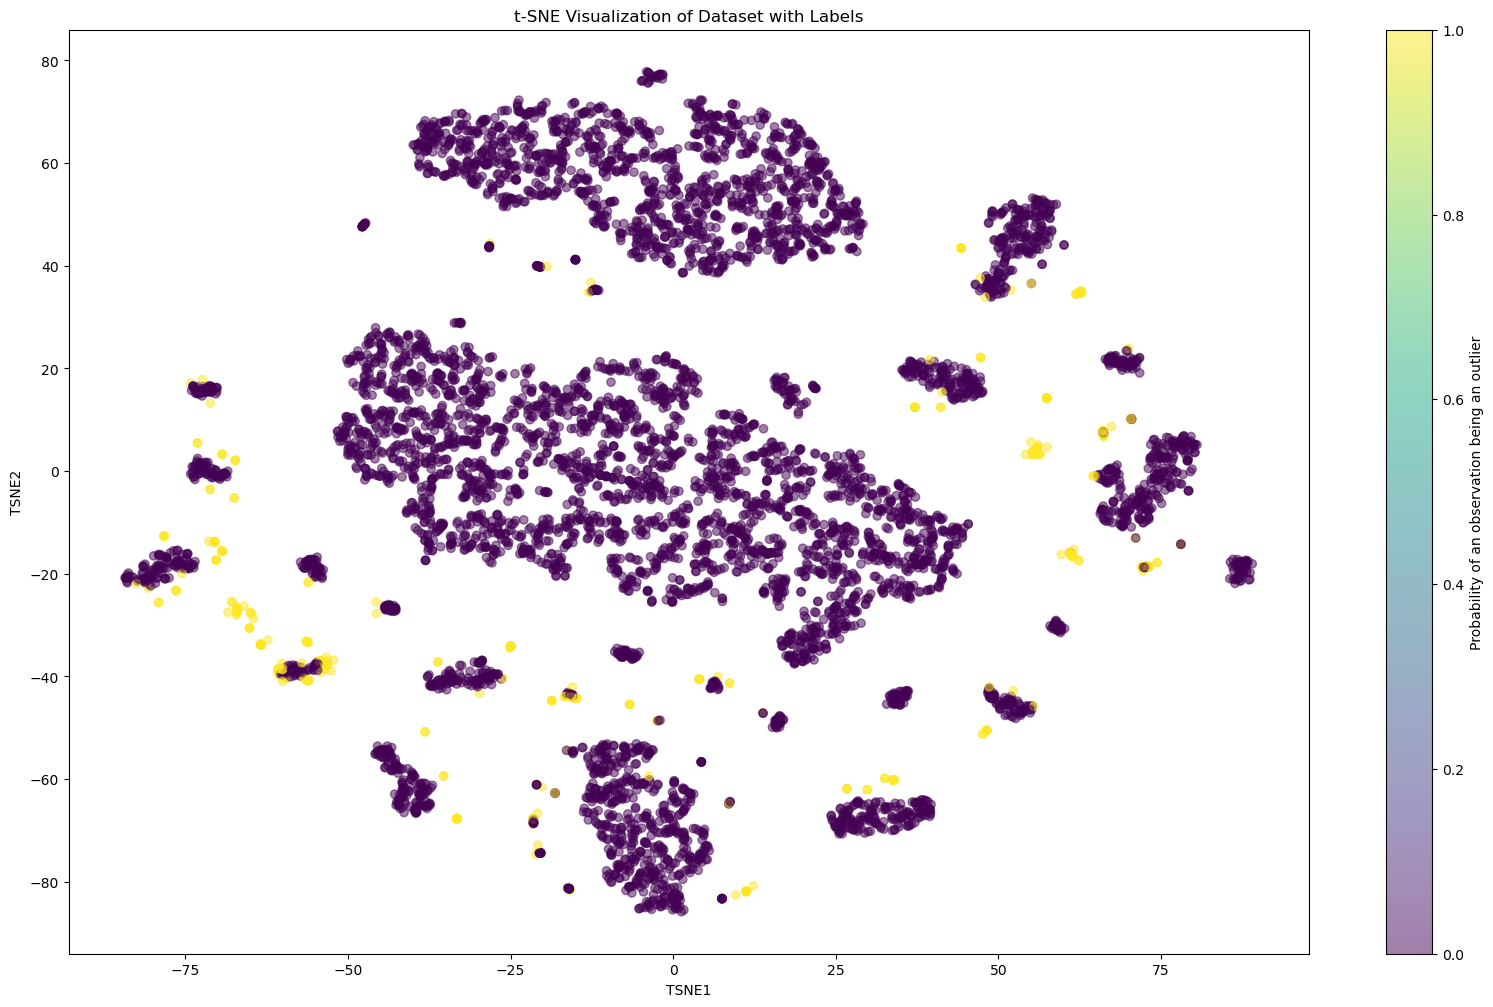

In [11]:
utils.plot_TSNE_2(dist_matrix= gower.gower_matrix(df), labels= np.array(outlier_indices) * -1)